# 🧠💡Smart Investing: Forecasting Samsung's Market

#### Introduction
Samsung Electronics Co., Ltd. is a major subsidiary of the Samsung Group and a global leader in technology and consumer electronics. Since its inception in 1938, Samsung has grown from a trading company into a multifaceted conglomerate. Samsung Electronics, established in 1969, has become one of the world’s largest manufacturers of smartphones, semiconductors, and electronic devices. This report details the analysis and forecasting of Samsung Electronics' stock prices using historical data since 2000.

#### Data Overview
The dataset comprises records of Samsung Electronics' stock price changes from 2000 onwards, featuring columns such as date, opening price, highest price of the day, lowest price of the day, closing price, adjusted closing price, and trading volume. With 6127 entries, this comprehensive dataset is instrumental in understanding long-term market trends and performing detailed analyses.

#### Data Preparation
The initial step in the analysis involved loading the dataset and preparing the data for analysis. This included:
- Converting the 'Date' column to a datetime format.
- Checking for and handling any missing values to ensure the dataset's completeness and accuracy.

#### Exploratory Data Analysis (EDA)
EDA was conducted to understand the basic characteristics of the data and identify any underlying patterns or anomalies. Key steps included:
- Generating summary statistics to provide an overview of the data distribution.
- Visualizing the closing price over time to identify trends, seasonal patterns, and significant fluctuations.

#### Feature Engineering
To enhance the dataset for modeling, additional features were engineered. This involved calculating moving averages, such as the 50-day and 200-day moving averages, which are common technical indicators used in stock market analysis. These features help smooth out short-term fluctuations and highlight longer-term trends.

#### Modeling
For the purpose of forecasting, two primary models were considered:

1. **ARIMA (AutoRegressive Integrated Moving Average) Model:**
   - The dataset was split into training and testing sets to evaluate the model’s performance.
   - The ARIMA model was fitted on the training data, and forecasts were generated for the testing period.
   - This model is widely used for time series forecasting due to its ability to handle various time series patterns.

2. **Prophet Model:**
   - Developed by Facebook, the Prophet model is designed for forecasting time series data that exhibit strong seasonal effects and several seasons of historical data.
   - The Prophet model was trained on the historical stock prices and used to predict future values.
   - The model's flexibility in handling missing data and outliers makes it suitable for financial time series forecasting.

#### Evaluation
The performance of the forecasting models was evaluated using appropriate metrics, such as Mean Squared Error (MSE), to quantify the accuracy of the predictions. Visualizations comparing the actual stock prices with the forecasted values provided insights into the models’ effectiveness.

#### Forecasting
Future stock prices were forecasted using the trained models. The results were visualized to provide a clear picture of the expected stock price trends. The Prophet model, in particular, allowed for plotting forecast components such as trend, weekly seasonality, and yearly seasonality, offering a detailed understanding of the factors influencing the stock prices.

#### Conclusion
This analysis and forecasting of Samsung Electronics' stock prices provided valuable insights into historical trends and future projections. The use of advanced time series models like ARIMA and Prophet demonstrated robust methodologies for financial forecasting. These models can aid investors and analysts in making informed decisions based on historical data and anticipated market movements. The comprehensive approach, from data preparation to model evaluation, ensures a thorough understanding and reliable forecasting of stock prices.

In [9]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/kaggle/input/samsung-stock-price-dataset/Samsung Dataset.csv')

# Convert 'Date' column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Check for missing values
print(data.isnull().sum())

# Fill or drop missing values if any
data = data.dropna()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


                                Date          Open          High  \
count                           6127   6127.000000   6127.000000   
mean   2012-01-28 09:53:12.231108352  28370.058756  28644.142321   
min              2000-01-04 00:00:00   2540.000000   2760.000000   
25%              2005-11-16 12:00:00  10700.000000  10900.000000   
50%              2011-12-27 00:00:00  21020.000000  21420.000000   
75%              2018-03-20 12:00:00  45590.000000  46100.000000   
max              2024-06-13 00:00:00  90300.000000  96800.000000   
std                              NaN  22589.409269  22764.800972   

                Low         Close     Adj Close        Volume  
count   6127.000000   6127.000000   6127.000000  6.127000e+03  
mean   28084.267994  28360.006528  24504.066849  2.117578e+07  
min     2420.000000   2730.000000   1988.168701  0.000000e+00  
25%    10560.000000  10720.000000   7901.645264  1.169668e+07  
50%    20740.000000  21060.000000  16245.702148  1.715000e+07  
75%

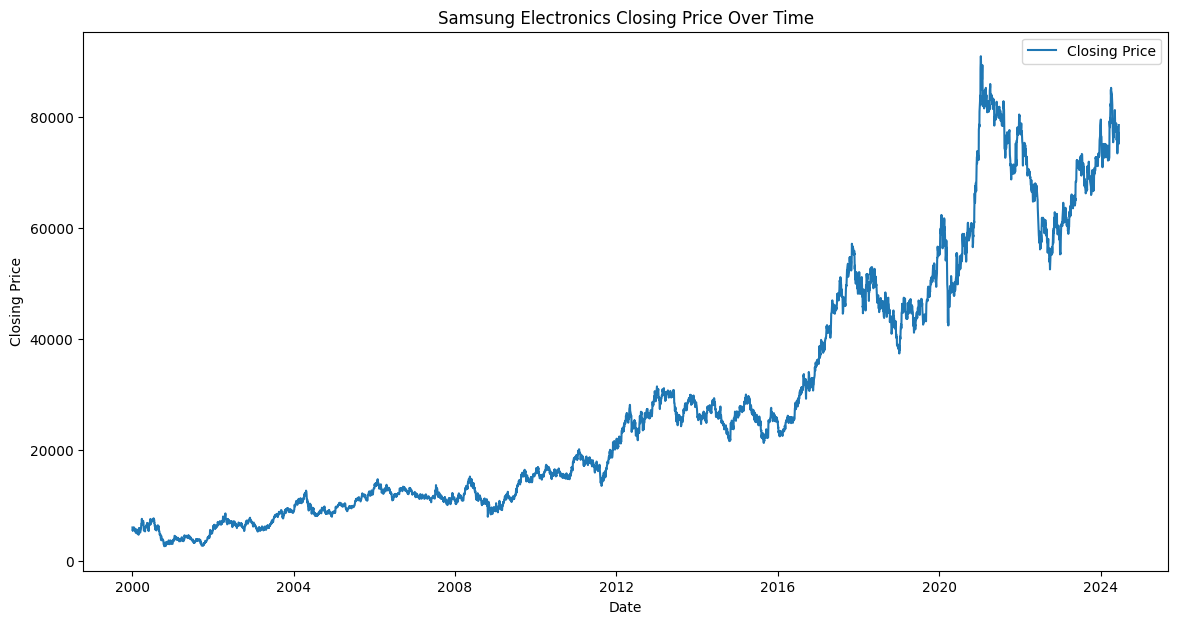

In [10]:
import matplotlib.pyplot as plt

# Summary statistics
print(data.describe())

# Plotting the closing price over time
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Samsung Electronics Closing Price Over Time')
plt.legend()
plt.show()

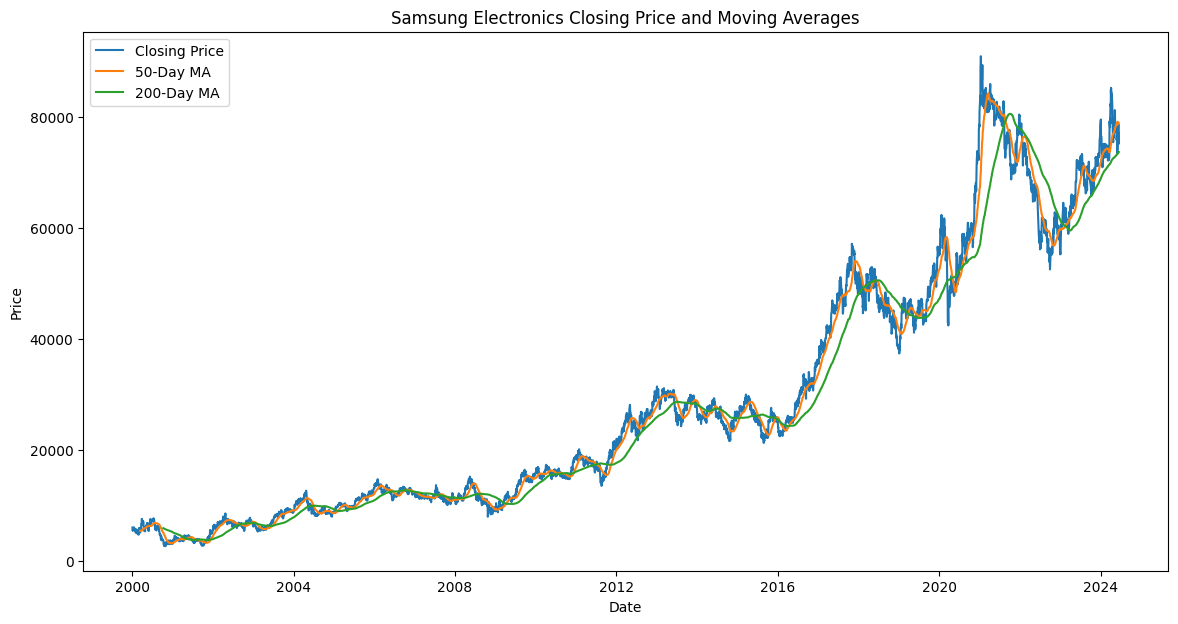

In [11]:
# Example: Calculate moving averages
data['MA50'] = data['Close'].rolling(window=50).mean()
data['MA200'] = data['Close'].rolling(window=200).mean()

# Plot moving averages along with closing price
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Closing Price')
plt.plot(data['Date'], data['MA50'], label='50-Day MA')
plt.plot(data['Date'], data['MA200'], label='200-Day MA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Samsung Electronics Closing Price and Moving Averages')
plt.legend()
plt.show()

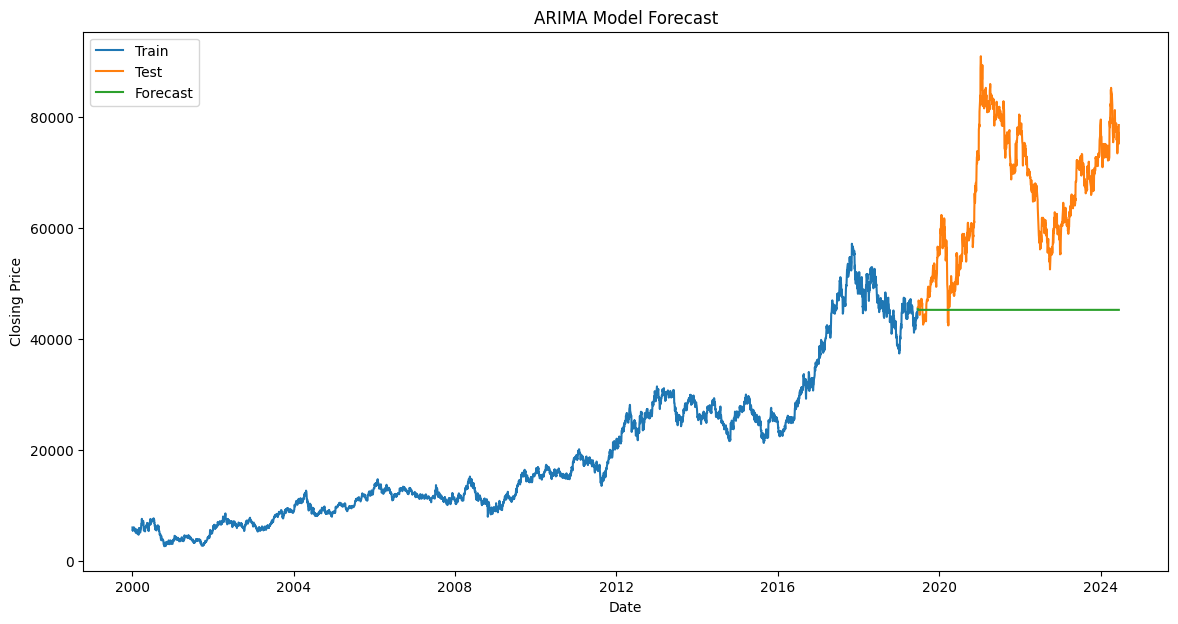

In [12]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

# Prepare the data for ARIMA
data.set_index('Date', inplace=True)
train, test = train_test_split(data['Close'], test_size=0.2, shuffle=False)

# Fit ARIMA model
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test))

# Plot the forecast
plt.figure(figsize=(14, 7))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('ARIMA Model Forecast')
plt.legend()
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error

# Calculate the Mean Squared Error
mse = mean_squared_error(test, forecast)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 545000677.3096896


13:48:54 - cmdstanpy - INFO - Chain [1] start processing
13:48:58 - cmdstanpy - INFO - Chain [1] done processing


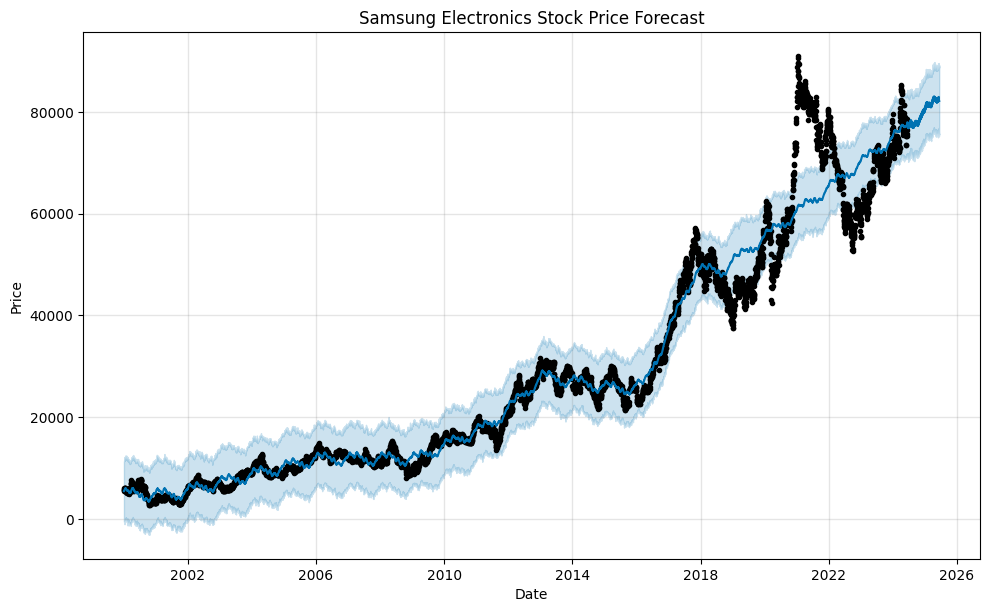

In [19]:
from prophet import Prophet

# Prepare the data for Prophet
df_prophet = data.reset_index()[['Date', 'Close']]
df_prophet.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)

# Fit Prophet model
model_prophet = Prophet()
model_prophet.fit(df_prophet)

# Make future predictions
future = model_prophet.make_future_dataframe(periods=365)
forecast = model_prophet.predict(future)

# Plot forecast
model_prophet.plot(forecast)
plt.title('Samsung Electronics Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()